# of frames= 17000
# of channels= 1
sampling width= 2
サンプリング周波数（Hz）= 8000
各種パラメータ= _wave_params(nchannels=1, sampwidth=2, framerate=8000, nframes=17000, comptype='NONE', compname='not compressed')


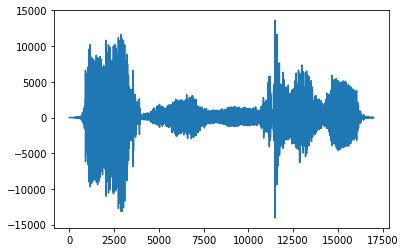

In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt

wf = wave.open("aiueo_wavesurfer.wav" , "r" )

# getnframes: オーディオフレーム数を返す
print("# of frames=", wf.getnframes())

# getnchannels: モノラル＝１，ステレオ＝２
print("# of channels=", wf.getnchannels())

# getsampwidth: サンプル幅(byte) 2byteなら16bit
print("sampling width=", wf.getsampwidth())

# getframerate サンプリング周波数
print("サンプリング周波数（Hz）=", wf.getframerate())

# getparams 各種パラメータ
print("各種パラメータ=", wf.getparams())

# readframes: 最大 n 個のオーディオフレームを読み込んで、 bytes オブジェクトとして返す
buf = wf.readframes(wf.getnframes())
# バイナリデータを16bit整数に変換
data = np.frombuffer(buf, dtype="int16")
plt.plot(data[00000:17000])
plt.show()          # グラフ表示